In [467]:
from IPython.display import Markdown as md

_nb_loc = "dataquest.ipynb"
_nb_title = "Objective Data Quest"

_nb_safeloc = _nb_loc.replace('/', '%2F')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_title, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/AllOneeeee/DataQuest24">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


In [468]:
print("Hello World")

Hello World


In [469]:
import tensorflow as tf

print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

2.13.0
GPU device not found


In [470]:
import pandas as pd

data = pd.read_csv("data/train.csv")
data.head()

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,NaN,22250.949602,1.00,...,0.0,0.0,NaN,0.0,89.883804,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.00,...,0.0,0.0,0.0,0.0,33.140182,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.75,...,NaN,0.0,NaN,0.0,401089.021138,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,NaN,82.478178,164.956355,1.00,...,NaN,0.0,0.0,0.0,24248.838425,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,NaN,NaN,72.516256,NaN,...,0.0,0.0,NaN,0.0,27580.022812,0.000000e+00,0.0,NaN,0.0,Benign


In [471]:
def calculate_missing_values(data):
    miss = data.isna().sum()
    miss_proportion = (miss / len(data)) * 100
    output_train = pd.DataFrame({
        'Missing Values': miss,
        'Proportion (%)': miss_proportion
    })    
    return output_train

def highlight_missing_values(val):
    if val > 30:
        color = 'background-color: red'
    elif val > 20:
        color = 'background-color: orange'
    elif val > 10:
        color = 'background-color: yellow'
    else:
        color = ''
    return color

print("Number of observations: {}".format(len(data)))
miss_data = calculate_missing_values(data)
styled_miss_data = miss_data.style.applymap(highlight_missing_values, subset=['Proportion (%)'])

styled_miss_data

Number of observations: 416473


,Missing Values,Proportion (%)
id,0,0.000000
origin_host,0,0.000000
origin_port,0,0.000000
response_host,0,0.000000
response_port,0,0.000000
flow_duration,117064,28.108425
forward_packets_per_sec,123392,29.627851
backward_packets_per_sec,92239,22.147654
flow_packets_per_sec,111750,26.832472
down_up_ratio,123615,29.681396


<Axes: >

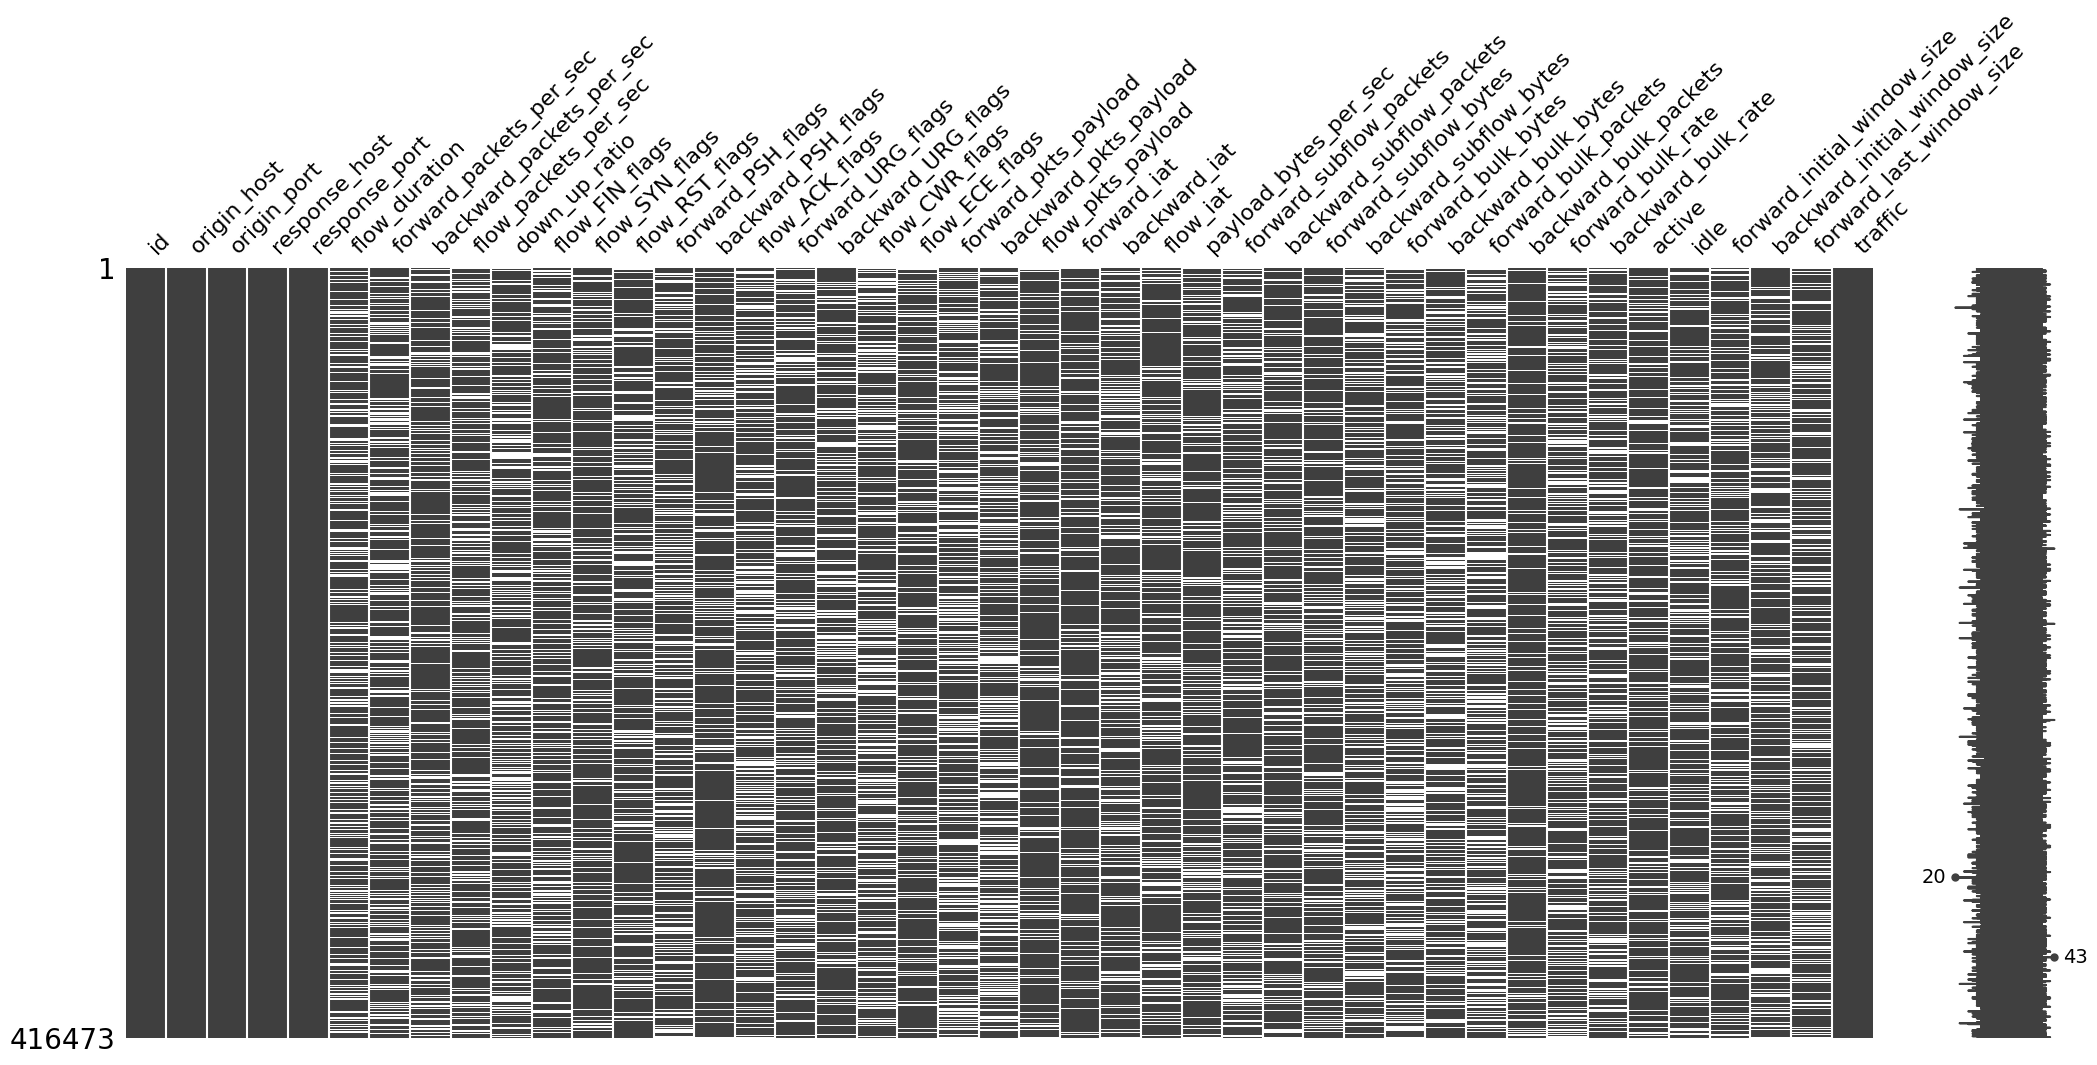

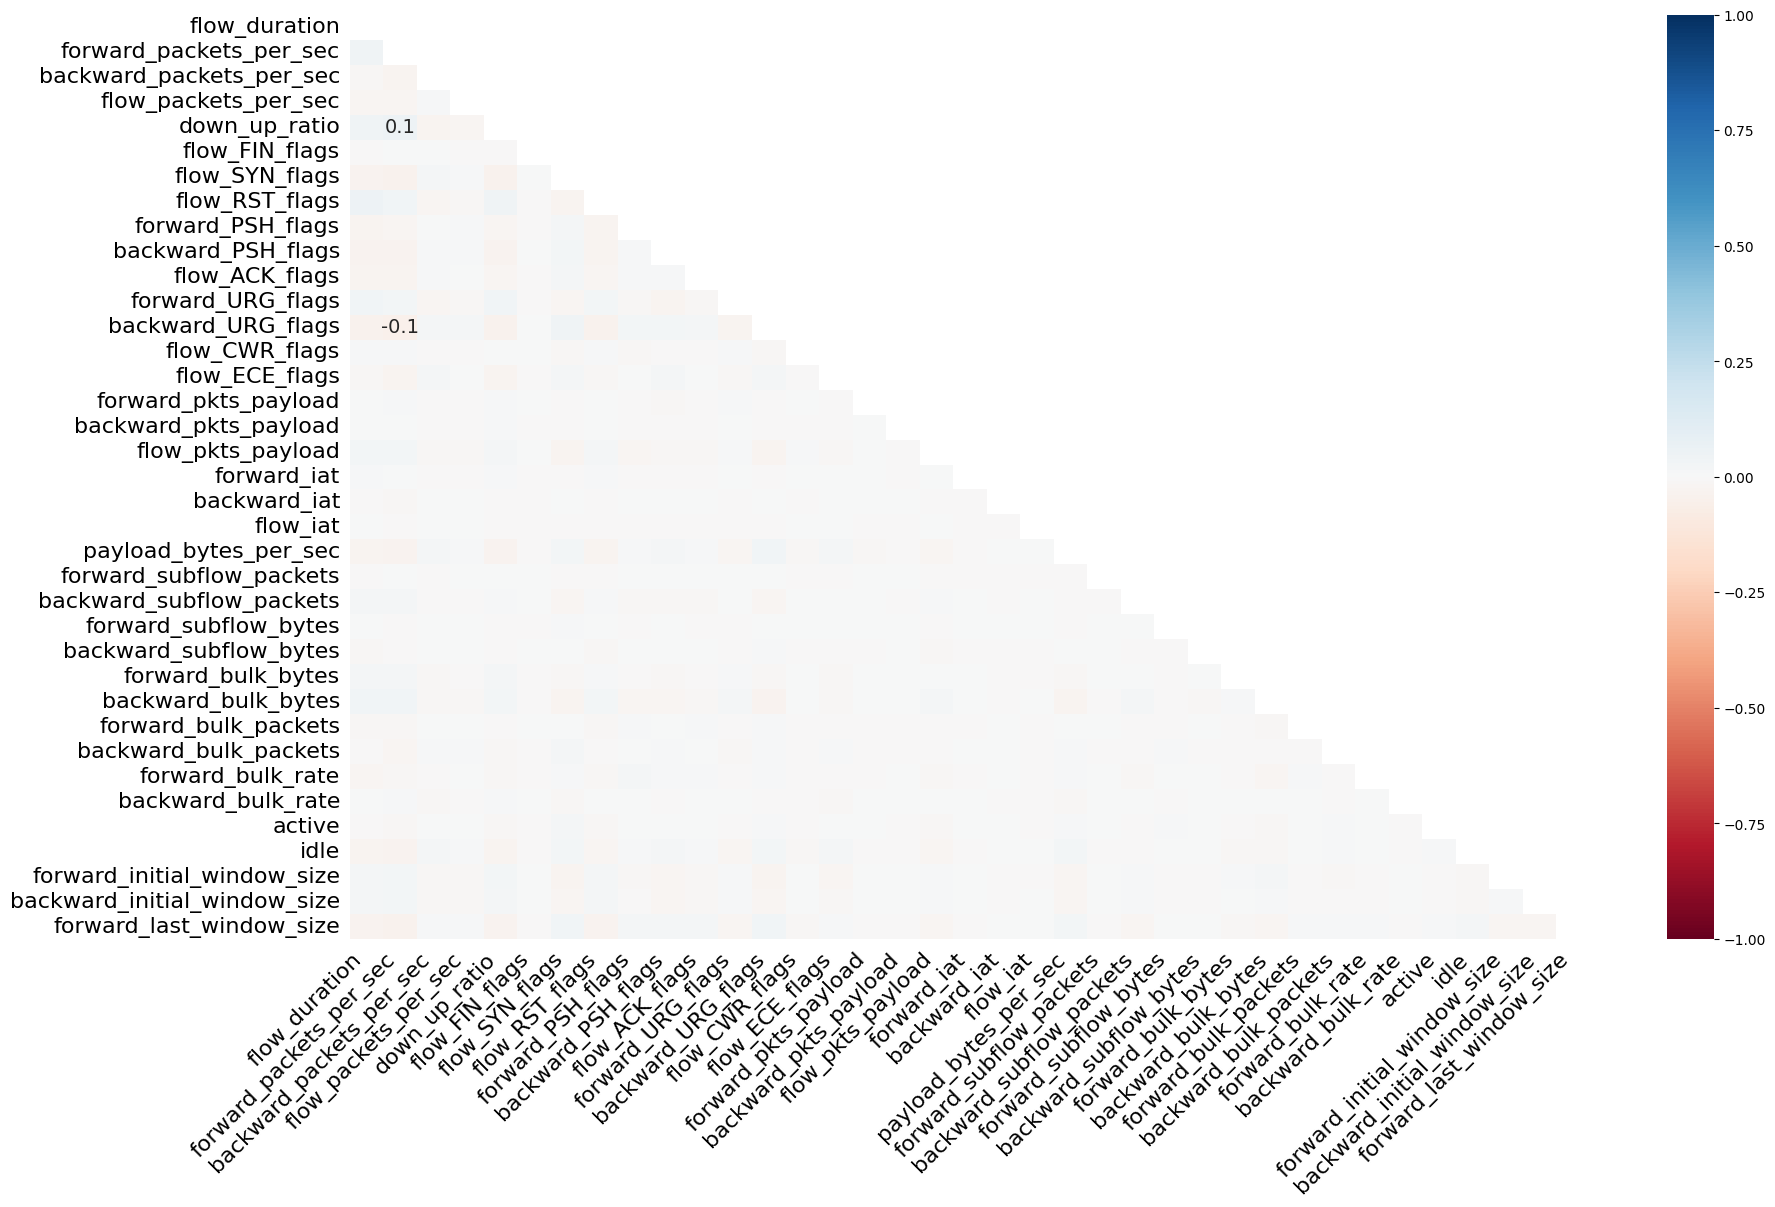

In [472]:
import missingno as msno

msno.matrix(data)
msno.heatmap(data)

In [473]:
def fill_packets(row):
    # Fill flow_packets_per_sec
    if pd.isna(row['flow_packets_per_sec']):
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    
    # Fill forward_packets_per_sec and backward_packets_per_sec
    if pd.isna(row['forward_packets_per_sec']) and not pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['backward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']):
        row['backward_packets_per_sec'] = row['forward_packets_per_sec']
        row['flow_packets_per_sec'] = row['forward_packets_per_sec'] + row['backward_packets_per_sec']
    if pd.isna(row['forward_packets_per_sec']) and pd.isna(row['backward_packets_per_sec']):
        row['forward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
        row['backward_packets_per_sec'] = row['flow_packets_per_sec'] / 2
    
    # Fill down_up_ratio
    if not pd.isna(row['backward_packets_per_sec']) and not pd.isna(row['forward_packets_per_sec']) and row['forward_packets_per_sec'] != 0:
        row['down_up_ratio'] = row['backward_packets_per_sec'] / row['forward_packets_per_sec']
    
    # Fill flow_pkts_payload
    if pd.isna(row['flow_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']) and not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = (row['forward_pkts_payload'] + row['backward_pkts_payload']) / 2
        elif not pd.isna(row['forward_pkts_payload']):
            row['flow_pkts_payload'] = row['forward_pkts_payload']
        elif not pd.isna(row['backward_pkts_payload']):
            row['flow_pkts_payload'] = row['backward_pkts_payload']
    
    # Fill forward_pkts_payload and backward_pkts_payload
    if pd.isna(row['forward_pkts_payload']) and pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['flow_pkts_payload']):
            row['forward_pkts_payload'] = row['flow_pkts_payload']
            row['backward_pkts_payload'] = row['flow_pkts_payload']
    elif pd.isna(row['forward_pkts_payload']):
        if not pd.isna(row['backward_pkts_payload']):
            row['forward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['backward_pkts_payload']
    elif pd.isna(row['backward_pkts_payload']):
        if not pd.isna(row['forward_pkts_payload']):
            row['backward_pkts_payload'] = 2*row['flow_pkts_payload'] - row['forward_pkts_payload']
    
    return row

data = data.apply(fill_packets, axis=1)

In [474]:
data

,id,origin_host,origin_port,response_host,response_port,flow_duration,forward_packets_per_sec,backward_packets_per_sec,flow_packets_per_sec,down_up_ratio,...,forward_bulk_packets,backward_bulk_packets,forward_bulk_rate,backward_bulk_rate,active,idle,forward_initial_window_size,backward_initial_window_size,forward_last_window_size,traffic
0,CkwI1TlUCRApPfcJl,103.255.15.27,45314,103.255.15.23,42001,0.000090,11125.474801,11125.474801,22250.949602,1.000000,...,0.0,0.0,NaN,0.000000e+00,8.988380e+01,NaN,29200.0,NaN,NaN,Background
1,CBlrcc3dvtaHzyV4zj,103.255.15.27,45060,103.255.15.23,42000,0.000033,30174.848921,30174.848921,60349.697842,1.000000,...,0.0,0.0,0.0,0.000000e+00,3.314018e+01,NaN,29200.0,0.0,NaN,Background
2,CdpSX33u29yjDvnVzi,103.255.15.23,3440,52.45.16.192,443,61.977190,0.322699,0.242025,0.564724,0.750002,...,NaN,0.0,NaN,0.000000e+00,4.010890e+05,9.861604e+06,29200.0,NaN,90.0,Background
3,CT23VJ1KsoKeCdWpx2,103.255.15.150,56132,8.8.8.8,53,0.024249,82.478178,82.478178,164.956356,1.000000,...,NaN,0.0,0.0,0.000000e+00,2.424884e+04,NaN,0.0,NaN,0.0,Benign
4,C6OJU51P50bwNKvnY6,103.255.15.150,43358,8.8.8.8,53,0.027580,36.258128,36.258128,72.516256,1.000000,...,0.0,0.0,NaN,0.000000e+00,2.758002e+04,0.000000e+00,0.0,NaN,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416468,COacmK2gmfhhWCrh73,103.255.15.150,53314,128.199.242.104,443,NaN,28.153470,36.599511,64.752981,1.300000,...,0.0,5.0,0.0,1.092664e+08,3.551960e+05,0.000000e+00,29200.0,65160.0,402.0,Probing
416469,CUxjxWgzdF71Y5kXc,103.255.15.23,59005,8.8.8.8,53,NaN,80.762198,80.762198,161.524396,1.000000,...,0.0,0.0,NaN,0.000000e+00,2.476406e+04,0.000000e+00,0.0,0.0,NaN,Benign
416470,CUU9WM3olirlj8Absj,103.255.15.23,7978,128.199.88.81,443,NaN,46.391519,46.391519,92.783038,1.000000,...,NaN,113.0,0.0,2.262403e+05,2.823808e+06,0.000000e+00,NaN,28960.0,0.0,Benign
416471,ChiYNu2wqDXFBTzHV4,fe80::c1a7:7791:969e:3c06,55784,2600:1901:0:38d7::,80,0.000000,0.000000,0.000000,0.000000,NaN,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,28800.0,0.0,NaN,Benign


In [475]:
miss_data = calculate_missing_values(data)
miss_data

,Missing Values,Proportion (%)
id,0,0.000000
origin_host,0,0.000000
origin_port,0,0.000000
response_host,0,0.000000
response_port,0,0.000000
flow_duration,117064,28.108425
forward_packets_per_sec,6622,1.590019
backward_packets_per_sec,6622,1.590019
flow_packets_per_sec,6622,1.590019
down_up_ratio,15312,3.676589


In [476]:
data['traffic'].unique()

array(['Background', 'Benign', 'Probing', 'Bruteforce',
       'XMRIGCC CryptoMiner', 'Bruteforce-XML'], dtype=object)

In [477]:
features_to_drop = miss_data[miss_data["Proportion (%)"] > 30].index
data_cleaned = data.drop(columns=features_to_drop)
print("Dropped features:", features_to_drop)

Dropped features: Index(['flow_ACK_flags', 'flow_CWR_flags', 'forward_bulk_bytes',
       'backward_bulk_bytes', 'forward_bulk_packets', 'forward_bulk_rate'],
      dtype='object')


In [478]:
# from sklearn.impute import KNNImputer

remove_col = ['id', 'origin_host', 'origin_port', 'response_host', 'response_port']
# traffic_col = data['traffic'].copy()
data = data.drop(columns=remove_col)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
# knn_imputer = KNNImputer(n_neighbors=5)

# data_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)
# data_imputed['traffic'] = traffic_col.values
# data_imputed = data_imputed.reset_index(drop=True)
# data_imputed.to_csv("data/processing/data_fill.csv", index=False)

In [479]:
CLASSES = 'Background', 'Benign', 'Probing', 'Bruteforce', 'XMRIGCC CryptoMiner', 'Bruteforce-XML'.split()

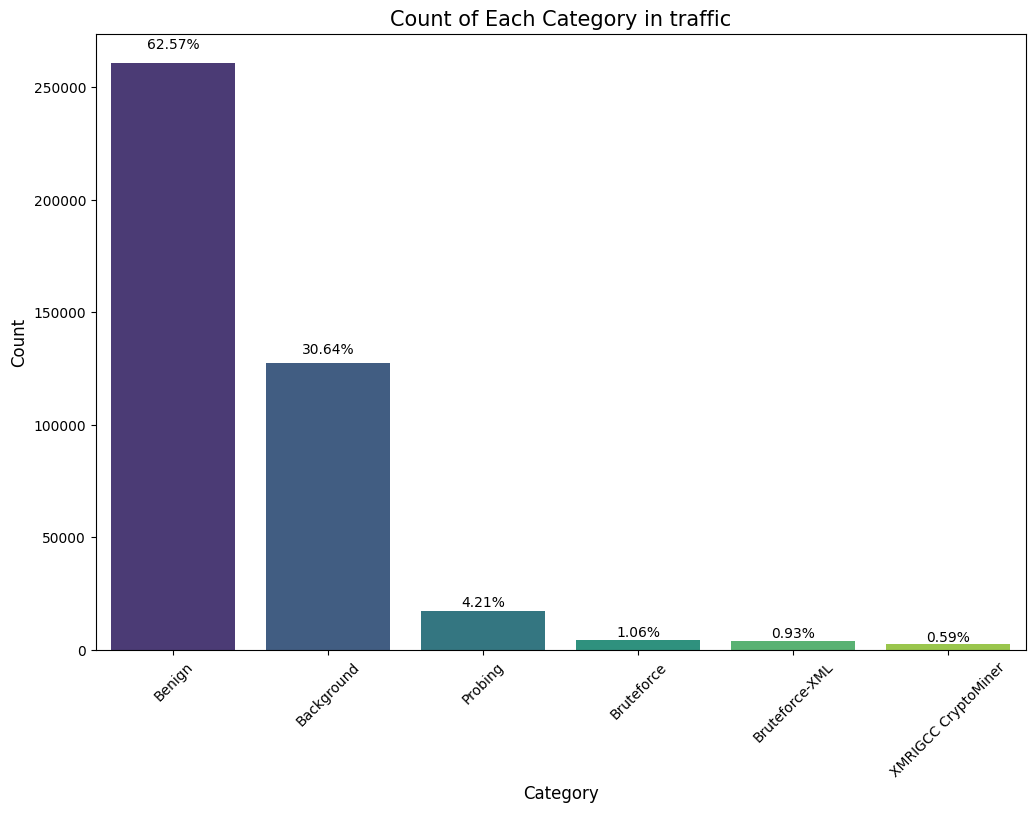

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_category_counts(data, column_name):
    
    counts = data[column_name].value_counts()
    
    sorted_counts = counts.sort_values(ascending=False)
    sorted_proportions = sorted_counts / sorted_counts.sum()
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    
    for bar in ax.patches:
        height = bar.get_height()
        category_name = bar.get_x() + bar.get_width() / 2
        proportion = sorted_proportions[sorted_counts.index[int(category_name)]]
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * height, 
                f'{proportion:.2%}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Count of Each Category in {column_name}', fontsize=15)
    plt.xticks(rotation=45)  
    plt.show()

plot_category_counts(data, 'traffic')

In [481]:
data.duplicated().sum()

24

In [482]:
def mean_by_traffic(data, output_file):

    mean_by_traffic_numerical = data.groupby('traffic')[numerical_columns].mean().round(2)

    mean_by_traffic_numerical.to_csv(output_file, index=True)

    print(mean_by_traffic_numerical)
    print(f"Mean values by traffic category have been saved to '{output_file}'.")

mean_by_traffic(data_imputed, 'data/processing/mean_by_traffic_numerical.csv')

                flow_duration  forward_packets_per_sec   
traffic                                                  
Background               7.59                  3138.99  \
Benign                   6.99                  1304.52   
Bruteforce               5.38                    36.73   
Bruteforce-XML           0.92                     2.37   
Probing                  0.88                    35.06   

                backward_packets_per_sec  flow_packets_per_sec  down_up_ratio   
traffic                                                                         
Background                       3456.14               5506.31           0.81  \
Benign                           1270.37               2387.54           0.91   
Bruteforce                         36.42                 73.14           0.99   
Bruteforce-XML                      2.21                  4.58           0.80   
Probing                            54.70                132.74           1.26   

                flow_FIN_

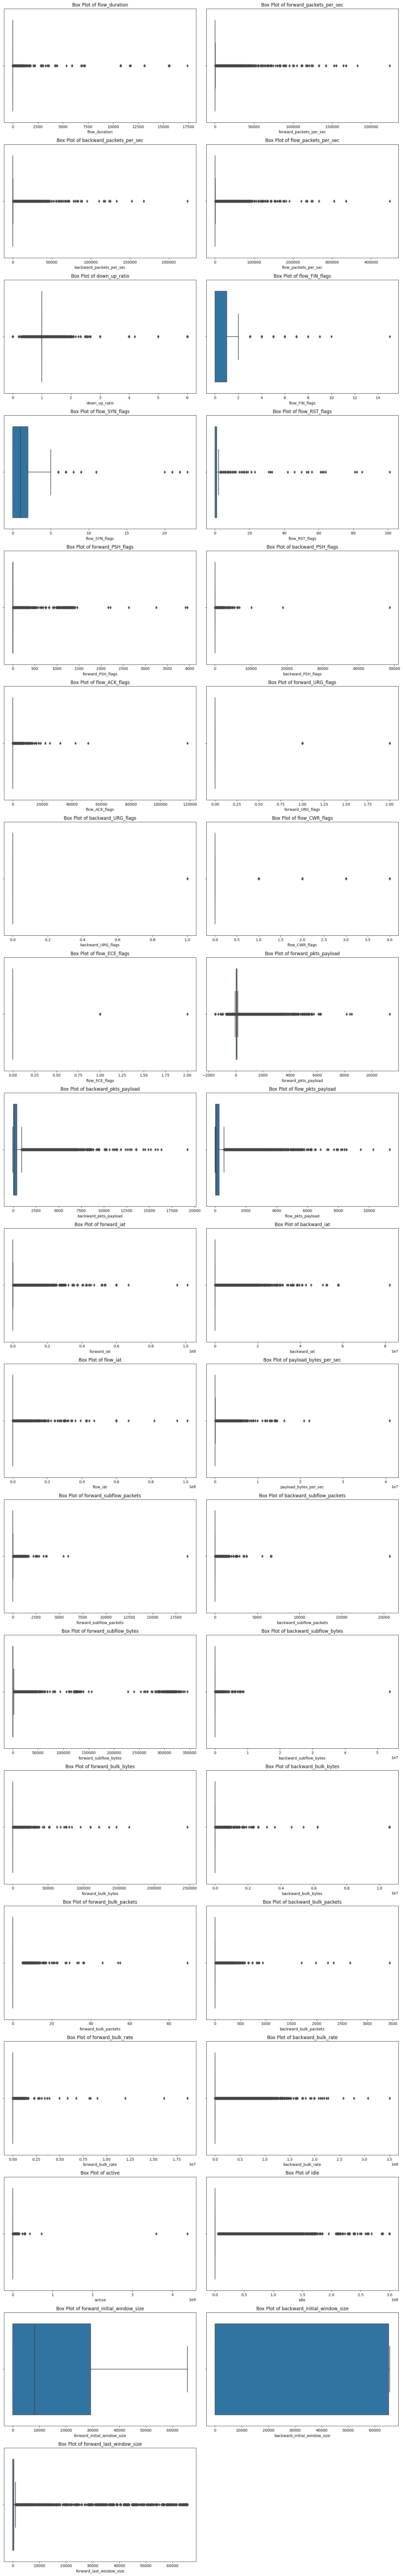

In [483]:
def plot_boxplots(data):
    num_cols=2
    num_plots = len(numerical_columns)
    num_rows = (num_plots + num_cols - 1) // num_cols 

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7.5, num_rows * 5))
    axes = axes.flatten()  

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

    for j in range(len(numerical_columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplots(data)

For big data problems, outliers are generally not a problem in fitting the regression to
be used in predicting new data. However, outliers are central to anomaly detection,
where finding outliers is the whole point. The outlier could also correspond to a case
of fraud or an accidental action. In any case, detecting outliers can be a critical busi‐
ness need.

In [484]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['traffic'], axis=1)  # Features 
y = data['traffic']                        # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Number of train data: {} \nNumber of test data: {}".format(len(X_train), len(y_test)))

Number of train data: 333178 
Number of test data: 83295


In [485]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees']
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42)]

for name, model in zip(classifier_names, classifiers):
    model.fit(X_train, y_train)
    print(f"{name} classifier has been trained.")


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, balanced_accuracy_score

results = {'Classifier': [], 'F1-Score': [], 'Balanced Accuracy': []}

for name, model in zip(classifier_names, classifiers):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    
    results['Classifier'].append(name)
    results['F1-Score'].append(f1)
    results['Balanced Accuracy'].append(balanced_acc)

df_results = pd.DataFrame(results)

styled_df = df_results.style.apply(lambda x: ['background-color: green' if v == max(x) else '' for v in x], subset=['F1-Score', 'Balanced Accuracy'])
styled_df


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


,Classifier,F1-Score,Balanced Accuracy
0,LR,0.197279,0.196409
1,kNN,0.207378,0.289562
2,Random Forest,0.366071,0.381594
3,Boosted Trees,0.281250,0.350168


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifier_names = ["LR", 'kNN', 'Random Forest', 'Boosted Trees']
classifiers = [LogisticRegression(random_state=42),
              KNeighborsClassifier(5),
              RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1,
                                     random_state=42),
              GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=5, random_state=42)]

for name, model in zip(classifier_names, classifiers):
    model.fit(X_train, y_train)
    print(f"{name} classifier has been trained.")


LR classifier has been trained.
kNN classifier has been trained.
Random Forest classifier has been trained.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Boosted Trees classifier has been trained.


In [ ]:
import numpy as np
import seaborn as sns

def display_confusion_matrix(cmat, score, f1, best_model):
    plt.figure(figsize=(12, 10))  
    ax = plt.gca()
    
    sns.heatmap(cmat, annot=True, fmt='.2f', cmap='Reds', ax=ax, 
                xticklabels=CLASSES, yticklabels=CLASSES,
                cbar=True, cbar_kws={'shrink': 0.8}, annot_kws={"size": 10})
    
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title('Confusion Matrix for {}'.format(best_model), fontsize=15)
    
    titlestring = ""
    if score is not None:
        titlestring += 'Balanced Accuracy = {:.3f} '.format(score)
    if f1 is not None:
        titlestring += '\nF1-Score = {:.3f} '.format(f1)
    if len(titlestring) > 0:
        plt.figtext(0.8, 1, titlestring, 
                    horizontalalignment='right', verticalalignment='bottom', 
                    fontsize=12, color='#804040', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
    
    plt.tight_layout()  
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/var/folders/5_/08qbvmz97ps_2g4d1swwmnwm0000gq/T/ipykernel_5807/3051270821.py:13: RuntimeWarning: invalid value encountered in divide
  cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/var/folders/5_/08qbvmz97ps_2g4d1swwmnwm0000gq/T/ipykernel_5807/3051270821.py:13: RuntimeWarning: invalid value encountered in divide
  cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]


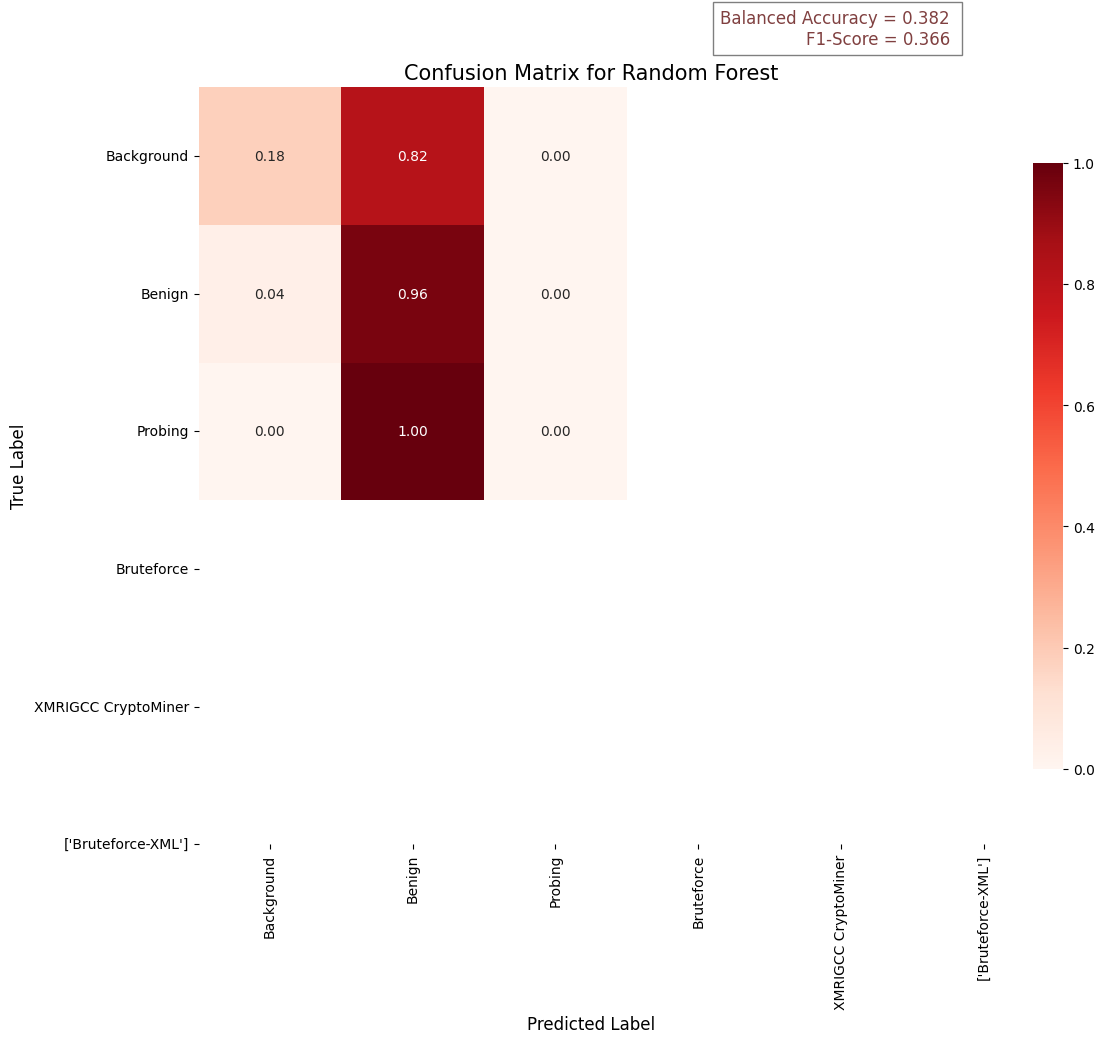

In [ ]:
from sklearn.metrics import confusion_matrix

best_model = None
best_f1 = 0
best_score = 0
best_cmat = None

for name, model in zip(classifier_names, classifiers):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    cmat = confusion_matrix(y_test, y_pred)
    cmat = cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis]
    
    if f1 > best_f1:  
        best_model = name
        best_f1 = f1
        best_score = balanced_acc
        best_cmat = cmat

display_confusion_matrix(best_cmat, best_score, best_f1, best_model)